<a href="https://colab.research.google.com/github/amir-ab/ML_KMeans_CarsData/blob/main/TP_Kmeans_voitures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ceci n'est pas une commande python c'est IPython
# inline : coller la figure a l'intérieure de jupyter lab
%matplotlib inline
#ceci n'est pas unde commande pyhon c'est Qt
# Qt : sotrir la figure a l'extérieur de jupyter
#%matplotlib qt

In [3]:
dataset = ("/content/Voitures_Origine.txt")
df = pd.read_csv(dataset,sep ="\t")
df.head()

,Numero,mpg,displacement,horsepower,weight,acceleration,origin
0,1,35,72,69,1613,18,japanese
1,2,31,76,52,1649,17,japanese
2,3,39,79,58,1755,17,japanese
3,4,35,81,60,1760,16,japanese
4,5,31,71,65,1773,19,japanese


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Numero        392 non-null    int64 
 1   mpg           392 non-null    int64 
 2   displacement  392 non-null    int64 
 3   horsepower    392 non-null    int64 
 4   weight        392 non-null    int64 
 5   acceleration  392 non-null    int64 
 6   origin        392 non-null    object
dtypes: int64(6), object(1)
memory usage: 21.6+ KB


In [5]:
df.describe()

,Numero,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,196.500000,23.492347,194.410714,104.469388,2977.584184,15.681122
std,113.304898,7.799924,104.645191,38.491160,849.402560,2.761232
min,1.000000,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,98.750000,17.000000,105.000000,75.000000,2225.250000,14.000000
50%,196.500000,23.000000,151.000000,93.500000,2803.500000,16.000000
75%,294.250000,29.000000,275.750000,126.000000,3614.750000,17.000000
max,392.000000,47.000000,455.000000,230.000000,5140.000000,25.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f387156af10>,
      dtype=object)

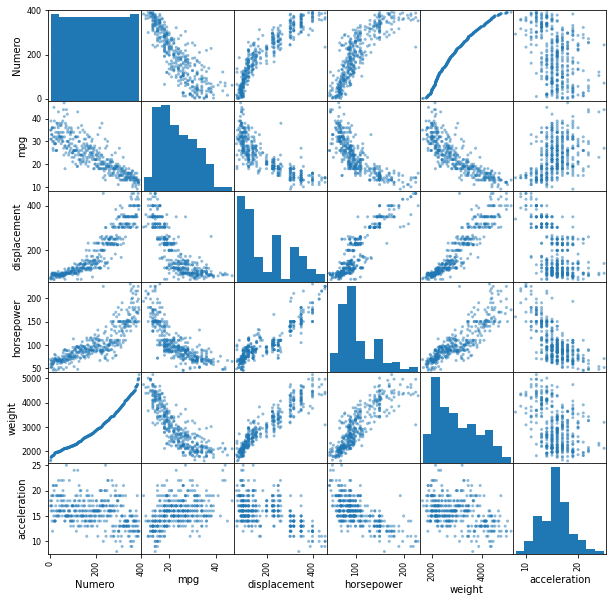

In [6]:
pd.plotting.scatter_matrix(df,figsize=(10,10))

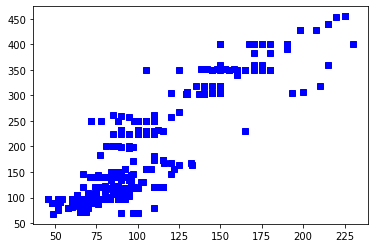

In [7]:
data = df.drop(['Numero','origin'],1,errors='ignore')

X = data.iloc[:,[2,1]]
X = X.values
plt.plot(X[:,0],X[:,1],"bs")

## Data Preparation
- Numerical data rescaling (StandardScaler Suppress the mean and divide by the standard deviation) 

- Applying Random Sampling 


In [8]:
# Remise a l'échelle obligatoire avec KMeans
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xss = ss.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test = train_test_split ( Xss, test_size = 0.2, random_state = 1 )

In [10]:
print(X_train.shape)
print(X_test.shape)
print(data.shape)

(313, 2)
(79, 2)
(392, 5)


## Modélisation KMeans

### Difference between 

- **MinMaxScaler**(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

- **StandardScaler**() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

- If there are outliers, use **RobustScaler()**. Alternatively you could remove the outliers and use either of the above 2 scalers (choice depends on whether data is normally distributed)

Additional Note: If scaler is used before train_test_split, data leakage will happen. Do use scaler after train_test_split

In [11]:
# Modélisation avec l'algorithem KMeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
# Implémentation de la méthode de caude "Elbow methode"
k_rng = range(1,10)
L = []
for k in k_rng:
  model = KMeans(n_clusters=k)
  model.fit(Xss)
  L.append(model.inertia_)

In [13]:
L

[783.9999999999999,
 211.46608810625173,
 119.82776411156055,
 79.9246545899549,
 55.46198833660236,
 46.51186398772833,
 37.38979845460362,
 33.273729884544174,
 30.026108603095317]

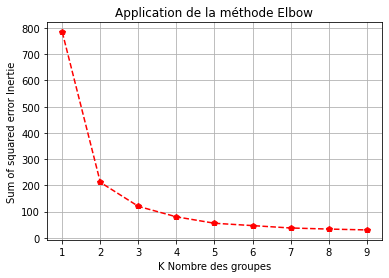

In [14]:
plt.plot(k_rng,L,"rp--")
plt.xlabel('K Nombre des groupes')
plt.ylabel('Sum of squared error Inertie')
plt.title('Application de la méthode Elbow')
plt.grid()

In [15]:
model = KMeans(n_clusters=3)

In [16]:
y_pred = model.fit_predict(X_train)

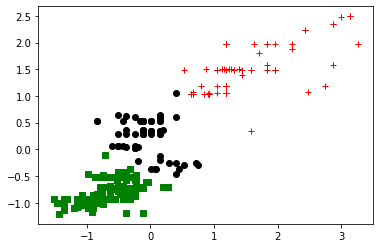

In [24]:
plt.plot(X_train[y_pred == 0,0], X_train[y_pred == 0,1], "r+" );
plt.plot(X_train[y_pred == 1,0], X_train[y_pred == 1,1], "gs" );
plt.plot(X_train[y_pred == 2,0], X_train[y_pred == 2,1], "ko" );